In [ ]:
"""
examines catA-v3 versus covref4 alignments
"""


In [ ]:
pip install pysam

In [1]:
import pysam
from collections import defaultdict

import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt

In [2]:
assemblies="catA-v3"
sam = pysam.AlignmentFile("%s-vs-covref4-map-pb.sam" %assemblies)

divs = []
alns = dict()
best_aln_score_per_query = dict()
alns_query = defaultdict(list)
alns_query_len = dict()
for aln in sam.fetch():
    query_name = aln.query_name
    query_length = aln.query_length
    ref_name = aln.reference_name
    if aln.has_tag('AS'):
        alignment_score = int(aln.get_tag('AS'))
    else:
        alignment_score = None
        print(query_name,ref_name,"no AS")
    if aln.has_tag('de'):
        div  = float(aln.get_tag('de'))
    else:
        div = None
        print(query_name,ref_name,"no de")
    #print(query_name,ref_name,alns,div)
    
    if div is None: continue
        
    # keep all alignments
    # divs += [(div,query_name,ref_name,alignment_score)]

    # record the best alignment per query
    if query_name not in best_aln_score_per_query:
        best_aln_score_per_query[query_name] = (div,query_name,ref_name,alignment_score)
    else:
        d,q,r,a = best_aln_score_per_query[query_name]
        #if d < div: 
        # only update if better alignment score
        if alignment_score > a: 
             best_aln_score_per_query[query_name] = (div,query_name,ref_name,alignment_score)
    
    alns[(query_name,ref_name)] = aln
    alns_query[query_name] += [ref_name]
    
    if query_name not in alns_query_len:
        alns_query_len[query_name] = query_length
    else:
        # for some reason i can't just record any hit
        alns_query_len[query_name] = max(query_length,alns_query_len[query_name])
            
    #print(aln)
    #break

divs = best_aln_score_per_query.values()
#print(divs)
#print(sorted(divs))

# analysis of the worst contig, the one which aligns with worst div
most_distant = sorted(divs)[-1]
div,q,r,a = most_distant
print("best alignment of worst query:",alns[(q,r)])
print("all alignments of worst query")
for r2 in alns_query[q]:
    print(alns[(q,r2)])
    


best alignment of worst query: SRR10873981	2048	35	21514	60	21368H74M1I2M3D2M2I11M2I3M2D136M1D5M1I128M2I4M1I2M1I5M4D28M1I3M2D2M1I40M1D4M1I47M1I3M1D11M1D11M4I5M1I2M3D5M1D55M1I3M1I5M2I9M2D1M1D2M1D4M4I3M1I2M1D9M2I2M4D2M2D28M1D2M1D2M2I37M4I8M1D4M3D9M2D7M2I32M1D2M1I11M1D1M1D2M2I7M2D2M6I3M6I1M1I8M1I4M5D3M2D5M2I2M1D9M3D4M1I5M3D4M2D2M3D2M1I50M4D1M1I14M1D6M1I3M2I3M4D2M1I2M1I4M1I4M3D7M5I43M2I1M2I7M1I3M2I3M2D2M2D7M2I4M4D5M1D52M2I6M2D22M2I6M2D19M1I3M1D6M2I3M1D1M1D100M1I5M1D112M1I6M2D5M1I52M1I4M1I3M2D21M1D3M1I34M2I3M2D294M1I6M1I2M2D50M3I6M1D1M2D133M2I4M2D15M2D4M3I5M1D1M1D3M1I23M1I3M1D39M3I4M1D3M2D28M3D4M3I10M3D91M4I9M4D24M1I4M1D8M1D12M1I26M3I5M3D211M2D2M1D5M2D1M1D6M1I14M1D5M1I2M3D6M2I5M3I5M1D2M3D7M3D7M1D4M2I1M1D13M2D2M2I6M2I18M1D13M9D5M2I12M1I6M1D80M1D15M1I205M1I1M2D2M1I158M1D5M1D1M2I7M4I3M1D3M3D128M3D1M1I12M2I62M1D3M1I208M2I3M1D3M2D10M1I8M3D3M2D3M4D4M1I2M2D5M2D8M3D2M1D5M1D2M3D3M2D3M2D70M1I2M2D4M5I13M5I3M1D2M1D4M2D7M165I57M1D6M1I14M2I1M2I8M2D2M2D96M1D1M2I1M1D11M1I4M1D67M2I1M5I2M1I4M6D5M2D208M4D16M2

worst alignment scores
    Assembly  Length  BestAlignmentScore BestReference
  ERR4164903   32040                2948   NC_045512.2
 SRR10873981   26508               11004   NC_011550.1
 SRR10873977   26576               11018   NC_011550.1
  ERR4181727   29749               30480    MT374101.1
  SRR7623977   27342               33322    LC260045.1
  SRR7239363   26091               37880    MT025058.1
 SRR11771957   29877               38720   NC_045512.2
  ERR4182199   30660               42274   NC_045512.2
 SRR11597220   29962               43414   NC_045512.2
  SRR1522982   29272               44573    EU186072.1
 SRR11772243   30990               44738   NC_045512.2
  ERR4018349   27612               45918    MK878536.1
 SRR10875068   26349               47010   NC_011549.1
 SRR10873770   26309               47160   NC_011549.1
  ERR4182443   30141               48056   NC_045512.2
  SRR8181896   27713               48327    DQ288927.1
  SRR7716793   31483               48591  

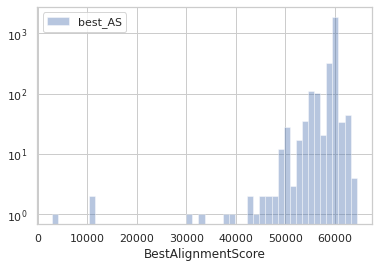

In [3]:
# plot alignment scores
best_alignment_scores = [(query_name,alns_query_len[query_name],
                          best_aln_score_per_query[query_name][3],
                          best_aln_score_per_query[query_name][2]) for query_name in best_aln_score_per_query]
#rint(best_alignment_scores)
data_best_alignment_scores= pd.DataFrame(best_alignment_scores, columns=['Assembly', 'Length','BestAlignmentScore','BestReference'])

sns.set(style="whitegrid")
ax = sns.distplot(data_best_alignment_scores['BestAlignmentScore'], kde=False, label="best_AS")
ax.set_yscale('log')
plt.legend()

print("worst alignment scores")
print(data_best_alignment_scores.sort_values(by=['BestAlignmentScore'])[:30].to_string(index=False))


print(len(data_best_alignment_scores[data_best_alignment_scores['BestAlignmentScore'] <= 24500]),"highly suspicious catA accessions out of",len(data_best_alignment_scores))
data_best_alignment_scores.to_csv('%s-to-covref4.alignment_scores.csv' % assemblies)

In [5]:
# Finding assemblies for which alignment score is not too close to their length but also not too far
# (maybe novel viruses?)
counter = 0
for accession in \
data_best_alignment_scores[
    (data_best_alignment_scores['BestAlignmentScore'] >= 0.8*data_best_alignment_scores['Length'])
    & 
    (data_best_alignment_scores['BestAlignmentScore'] <= 0.95*data_best_alignment_scores['Length'])
    ]['Assembly']:
    entry = data_best_alignment_scores[data_best_alignment_scores['Assembly'] == accession]
    print(entry)
    ref = entry['BestReference'].values[0]
    print("cigar",alns[(accession,ref)].cigarstring)
    counter += 1
print(counter,"entries")

0 entries
